In [1]:
import pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from scipy.interpolate import interp1d

In [2]:
from optimization_target import target_func, FUNC_DOMAIN, FUNC_RANGE, TUNABLE_PARAM_NAME, METRIC_NAME

In [3]:
print(f"x: target_func domain = {FUNC_DOMAIN} :: {TUNABLE_PARAM_NAME}")
print(f"y: target_func range  = {FUNC_RANGE} :: {METRIC_NAME}")

x: target_func domain = (0, 1000000) :: sched_migration_cost_ns
y: target_func range  = (0.2, 1.8) :: Latency, ms


In [17]:
NUM_SAMPLES = 11

In [18]:
df = pandas.DataFrame({"x": [500000], "y": [target_func(500000)]})
df

,x,y
0,500000,0.6125


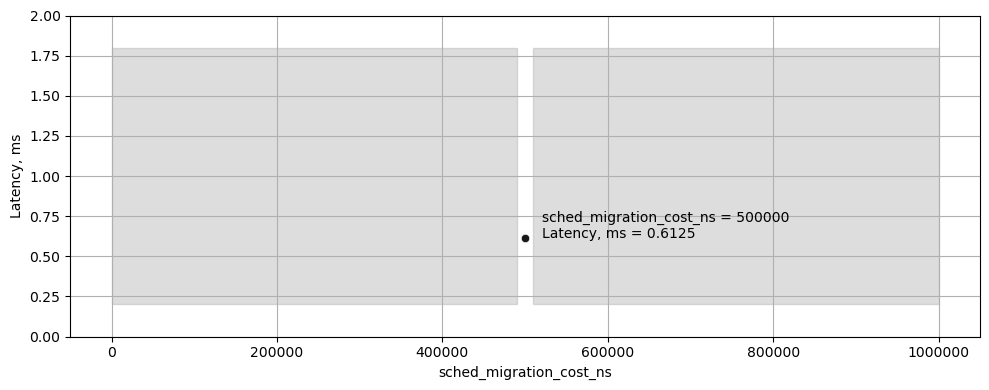

In [26]:
plt.rcParams["figure.figsize"] = (10, 4)

_fig, ax = plt.subplots()

# ax.add_patch(patches.Rectangle(
#     xy=(0, 0.2), width=1000000, height=1.6,
#     color="#CCCCCC", alpha=0.5, fill=True,
# ))

ax.add_patch(patches.Rectangle(
    xy=(0, 0.2), width=490000, height=1.6,
    color="#AAAAAA", alpha=0.4, fill=True,
))

ax.add_patch(patches.Rectangle(
    xy=(510000, 0.2), width=490000, height=1.6,
    color="#AAAAAA", alpha=0.4, fill=True,
))

sns.scatterplot(data=df, x="x", y="y", marker='o', color="black", alpha=0.9)
plt.text(df.x[0] + 20000, df.y[0],
         f"{TUNABLE_PARAM_NAME} = {df.x[0]}\n{METRIC_NAME} = {df.y[0]:.4f}",
         horizontalalignment='left', size='medium', color='black')


plt.xlim(-50000, 1050000)
plt.ylim(0, 2)

plt.ticklabel_format(axis="x", style="plain")

plt.xlabel(TUNABLE_PARAM_NAME)
plt.ylabel(METRIC_NAME)
# plt.title("Optimizing Redis performance")
plt.grid()
plt.tight_layout()

plt.savefig("img/sigmod2025_tutorial_02_bo_01_default.png", transparent=False, dpi=300)
plt.show()

In [8]:
np.random.seed(47)

In [9]:
df_rand = pandas.DataFrame({"x": np.random.uniform(*FUNC_DOMAIN, NUM_SAMPLES)})
df_rand["y"] = df_rand.x.apply(target_func)
# df_rand.head(5)

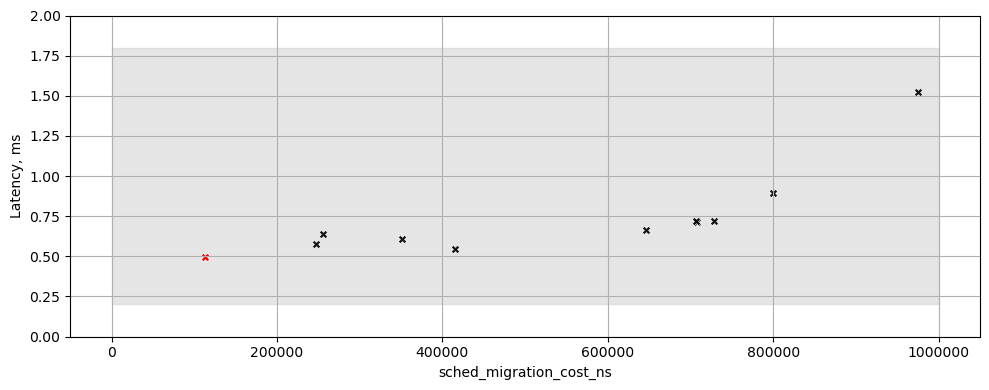

In [10]:
plt.rcParams["figure.figsize"] = (10, 4)

_fig, ax = plt.subplots()

ax.add_patch(patches.Rectangle(
    xy=(0, 0.2), width=1000000, height=1.6,
    color="#CCCCCC", alpha=0.5, fill=True,
))

sns.scatterplot(data=df_rand, x="x", y="y", marker='X', color="black", alpha=0.9)
sns.scatterplot(data=df_rand.loc[[df_rand.y.argmin()]], x="x", y="y", marker='X', color="red", alpha=1)

# Best point from grid search
# sns.scatterplot(data=df_grid.loc[[df_grid.y.argmin()]], x="x", y="y", marker='o', color="red", alpha=1)

x = np.concatenate([df_rand.x.to_numpy(), [df_grid.x[df_grid.y.argmin()]]])
func_interp = interp1d(x, target_func(x), kind='quadratic')
x_interp = np.linspace(x.min(), x.max(), 201)
y_interp = func_interp(x_interp)

# sns.lineplot(x=x_interp, y=y_interp, color="black", alpha=0.6, linestyle='--')

plt.xlim(-50000, 1050000)
plt.ylim(0, 2)

plt.ticklabel_format(axis="x", style="plain")

plt.xlabel(TUNABLE_PARAM_NAME)
plt.ylabel(METRIC_NAME)

# plt.title("Optimizing Redis performance")
plt.grid()
plt.tight_layout()

plt.savefig("img/sigmod2025_tutorial_01_grid_03_random.png", transparent=False, dpi=300)
plt.show()

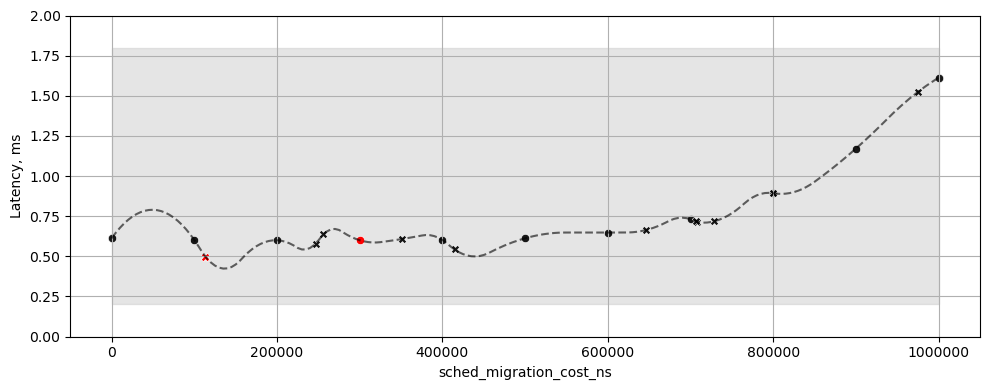

In [11]:
plt.rcParams["figure.figsize"] = (10, 4)

_fig, ax = plt.subplots()

ax.add_patch(patches.Rectangle(
    xy=(0, 0.2), width=1000000, height=1.6,
    color="#CCCCCC", alpha=0.5, fill=True,
))

sns.scatterplot(data=df_grid, x="x", y="y", marker='o', color="black", alpha=0.9)
sns.scatterplot(data=df_grid.loc[[df_grid.y.argmin()]], x="x", y="y", marker='o', color="red", alpha=1)

sns.scatterplot(data=df_rand, x="x", y="y", marker='X', color="black", alpha=0.9)
sns.scatterplot(data=df_rand.loc[[df_rand.y.argmin()]], x="x", y="y", marker='X', color="red", alpha=1)

x = np.concatenate([df_grid.x, df_rand.x])
func_interp = interp1d(x, target_func(x), kind='quadratic')
x_interp = np.linspace(x.min(), x.max(), 201)
y_interp = func_interp(x_interp)

sns.lineplot(x=x_interp, y=y_interp, color="black", alpha=0.6, linestyle='--')

plt.xlim(-50000, 1050000)
plt.ylim(0, 2)

plt.ticklabel_format(axis="x", style="plain")

plt.xlabel(TUNABLE_PARAM_NAME)
plt.ylabel(METRIC_NAME)

# plt.title("Optimizing Redis performance")
plt.grid()
plt.tight_layout()

# plt.savefig("img/sigmod2025_tutorial_01_grid_04_all.png", transparent=False, dpi=300)
plt.savefig("img/sigmod2025_tutorial_01_grid_05_all_interp.png", transparent=False, dpi=300)
plt.show()